# Data Visualization


Visualizations saved to visualizations/

Processing statistics:
Original games: 50872
Processed games: 39533
Processed recommendations: 10225393


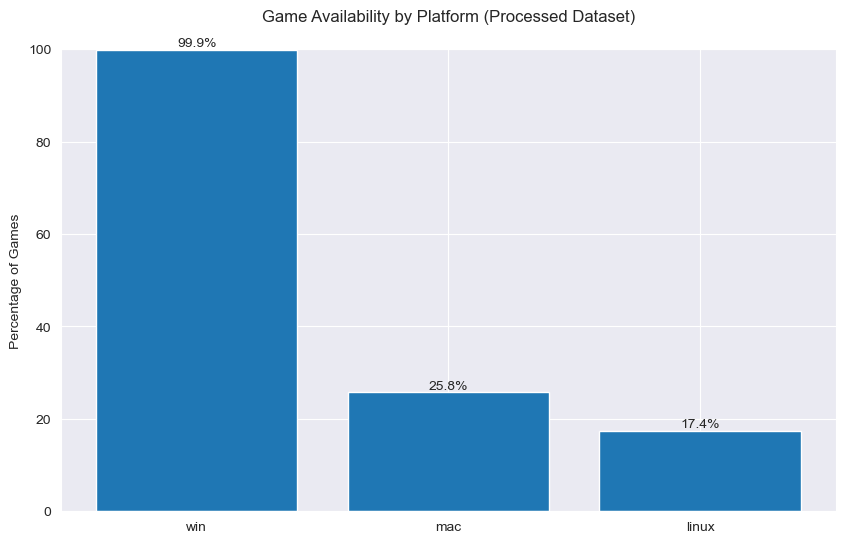

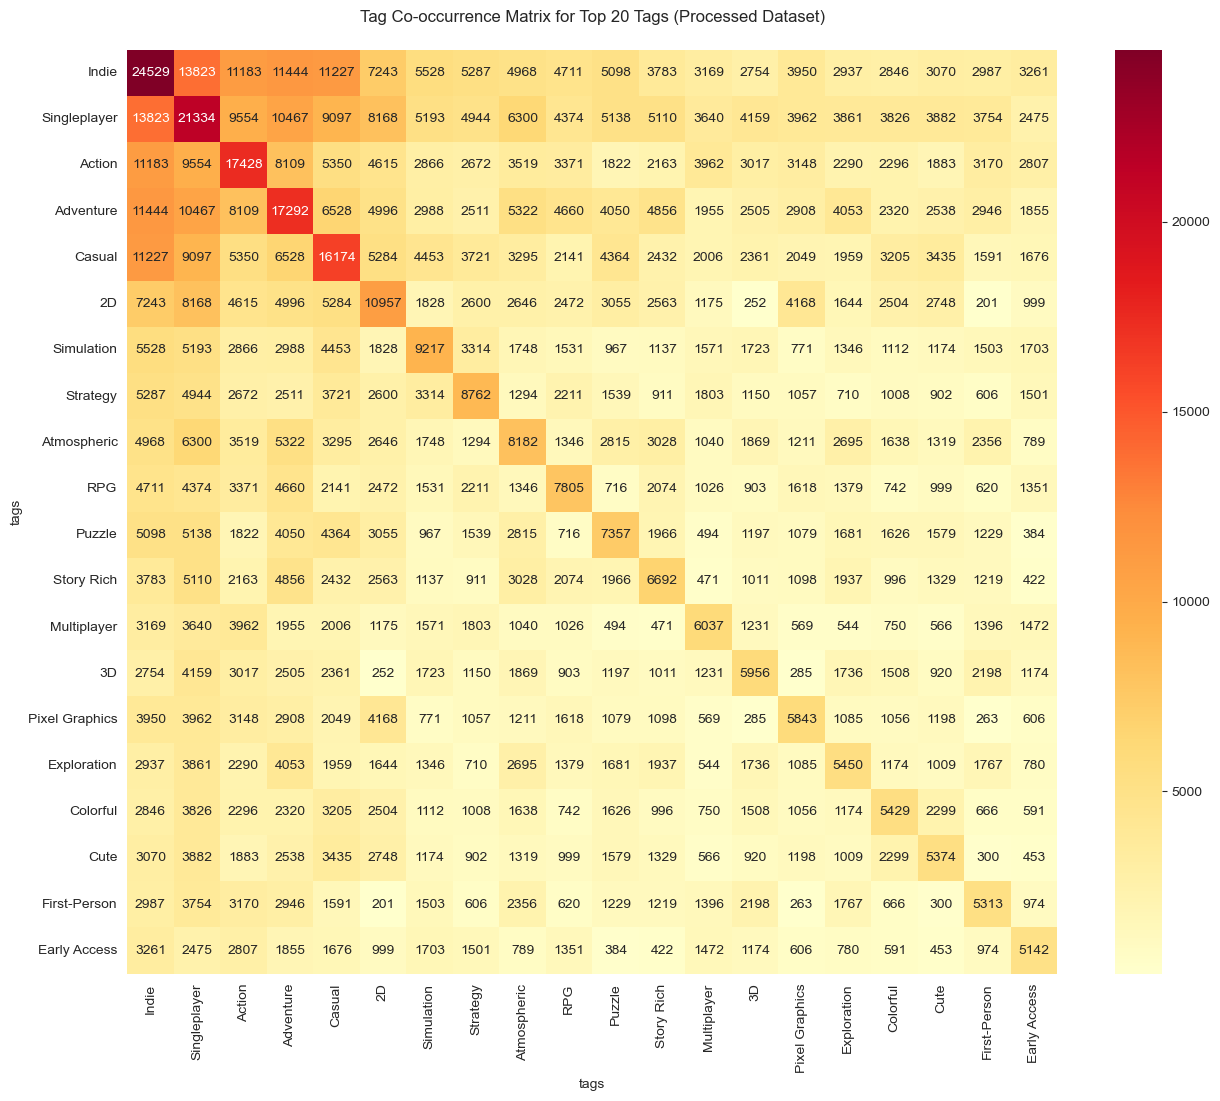

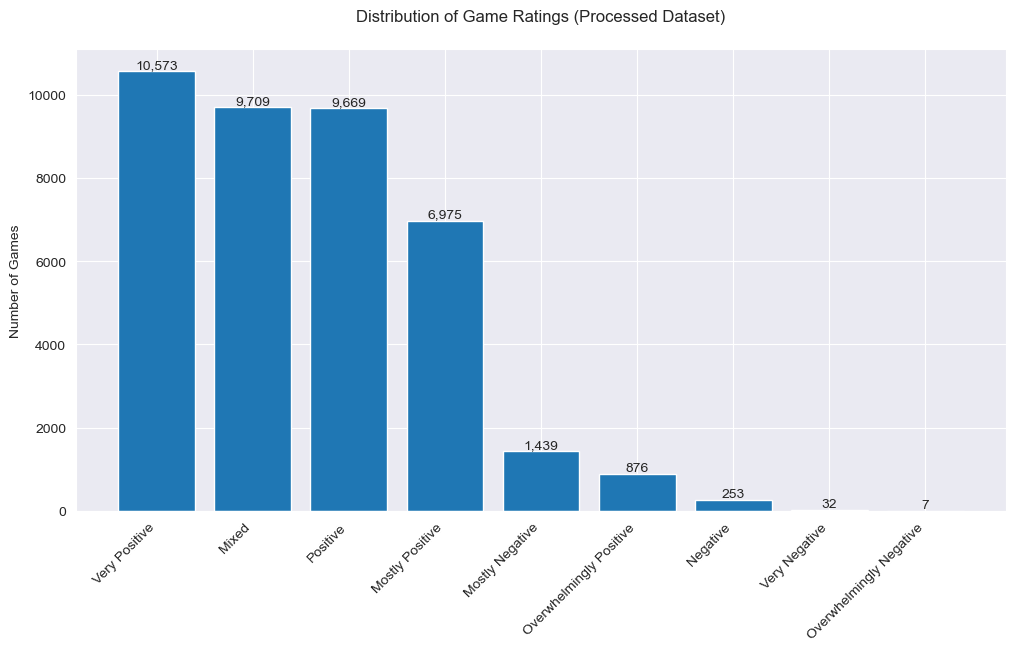

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import json
import os

def load_processed_data(processed_dir='processed_data/'):
    """Load processed data files."""
    df_games = pd.read_csv(os.path.join(processed_dir, 'processed_games.csv'))
    df_recommendations = pd.read_csv(os.path.join(processed_dir, 'processed_recommendations.csv'))

    with open(os.path.join(processed_dir, 'processed_metadata.json'), 'r') as f:
        metadata = json.load(f)

    with open(os.path.join(processed_dir, 'stats/processing_stats.json'), 'r') as f:
        stats = json.load(f)

    return df_games, df_recommendations, metadata, stats

def plot_game_platform_distribution(df_games):
    """Plot distribution of games across platforms."""
    platforms = ['win', 'mac', 'linux']
    counts = [df_games[platform].sum() for platform in platforms]
    percentages = [count/len(df_games)*100 for count in counts]

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(platforms, percentages)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

    ax.set_title('Game Availability by Platform (Processed Dataset)', pad=20)
    ax.set_ylabel('Percentage of Games')
    ax.set_ylim(0, 100)

    return fig

def plot_top_tags_heatmap(metadata, top_n=20):
    """Create a heatmap showing tag co-occurrence."""
    # Create DataFrame with game_id and tags
    tags_data = [(game['app_id'], tag)
                 for game in metadata
                 for tag in game['tags']]
    tags_df = pd.DataFrame(tags_data, columns=['app_id', 'tags'])

    # Get top N most common tags
    top_tags = tags_df['tags'].value_counts().head(top_n).index

    # Create co-occurrence matrix
    cooc_matrix = pd.DataFrame(0, index=top_tags, columns=top_tags)

    # Fill co-occurrence matrix
    for game in metadata:
        game_tags = set(game['tags'])
        game_top_tags = game_tags.intersection(top_tags)
        for tag1 in game_top_tags:
            for tag2 in game_top_tags:
                cooc_matrix.loc[tag1, tag2] += 1

    plt.figure(figsize=(15, 12))
    sns.heatmap(cooc_matrix, annot=True, fmt='g', cmap='YlOrRd')
    plt.title('Tag Co-occurrence Matrix for Top 20 Tags (Processed Dataset)', pad=20)

    return plt.gcf()

def plot_rating_distribution(df_games):
    """Create a bar plot of game ratings distribution."""
    rating_counts = df_games['rating'].value_counts()

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(rating_counts.index, rating_counts.values)

    plt.xticks(rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}',
                ha='center', va='bottom')

    ax.set_title('Distribution of Game Ratings (Processed Dataset)', pad=20)
    ax.set_ylabel('Number of Games')

    return fig

df_games, df_recommendations, metadata, stats = load_processed_data()

plots = {
    'platform_distribution': plot_game_platform_distribution(df_games),
    'tag_heatmap': plot_top_tags_heatmap(metadata),
    'rating_distribution': plot_rating_distribution(df_games)
}

output_dir = 'visualizations/'
os.makedirs(output_dir, exist_ok=True)

for name, fig in plots.items():
    fig.savefig(f'{output_dir}{name}.png', bbox_inches='tight', dpi=300)

print(f"Visualizations saved to {output_dir}")
print("\nProcessing statistics:")
print(f"Original games: {stats['original_games']}")
print(f"Processed games: {stats['processed_games']}")
print(f"Processed recommendations: {stats['processed_recommendations']}")